<a href="https://colab.research.google.com/github/Inno732/Defi_IA_1_2023_2024/blob/main/1st_classifier2023_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! nvidia-smi

Sun Oct 15 18:25:29 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras import utils
import numpy as np
from keras.datasets import mnist
np.random.seed(2017)

In [ ]:
# Importer les données
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


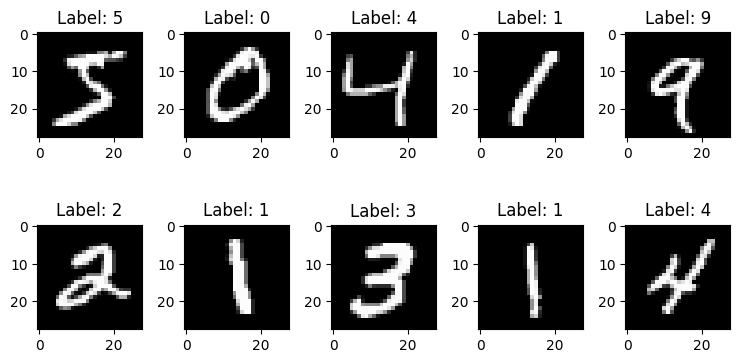

In [ ]:
# Afficher les dix premières images avec désignation de leurs labels
import matplotlib.pyplot as plt
%matplotlib inline
num = 10
images = x_train[:num]
labels = y_train[:num]
num_row = 2
num_col = 5
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
     ax = axes[i//num_col, i%num_col]
     ax.imshow(images[i], cmap='gray')
     ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [ ]:
# taille et format des données
images.shape

(10, 28, 28)

In [ ]:
# Redimensionner les données
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])

In [ ]:
#Normaliser les données : pour avoir des valeurs de pixels compris entre 0 et 1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [ ]:
#Encodez et normaliser les données de sorties (labels)
nb_classes=10
y_train=utils.to_categorical(y_train,nb_classes)
y_test=utils.to_categorical(y_test,nb_classes)

In [ ]:
# Définir le premier modèle avec une seule couche cachée
model = Sequential()

model.add(Dense(nb_classes, input_dim = 784))
model.add(Activation('softmax'))

In [ ]:
# Compiler le modèle
model.compile(loss= 'categorical_crossentropy',
              optimizer ='sgd',
              metrics = ['accuracy'])

In [ ]:
# Entraîner le modèle sur les données d’entrainement
history = model.fit(x_train, y_train, epochs=12)

Epoch 1/12
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7831 - accuracy: 0.8147
Epoch 2/12
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4587 - accuracy: 0.8802
Epoch 3/12
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4055 - accuracy: 0.8909
Epoch 4/12
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3787 - accuracy: 0.8962
Epoch 5/12
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3618 - accuracy: 0.9000
Epoch 6/12
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3496 - accuracy: 0.9031
Epoch 7/12
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3407 - accuracy: 0.9056
Epoch 8/12
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3334 - accuracy: 0.9069
Epoch 9/12
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3275 - accuracy: 0.9089
Epoch 10/12
1875/1875 [==============================] - 5s 3ms/step - loss: 0.322

313/313 [==============================] - 0s 1ms/step


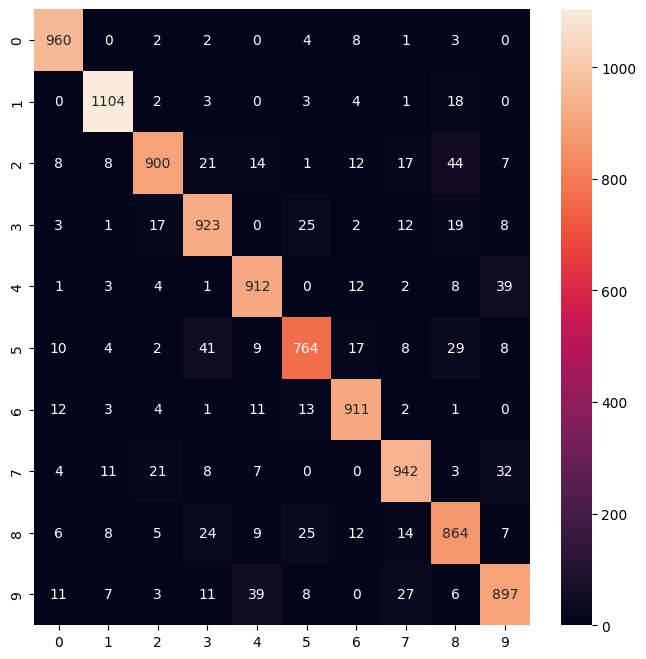

In [ ]:
# Matrice de transition
import sklearn.metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
y_predictions = np.argmax (model.predict (x_test), axis=-1)
y_predictions=utils.to_categorical(y_predictions,nb_classes)
plt.figure(figsize=(8,8))
cm = sklearn.metrics.confusion_matrix(y_test.argmax(axis = 1),y_predictions.argmax(axis=1))
sns. heatmap(cm, annot=True, fmt='g' )
plt.show()

Text(0, 0.5, 'loss')

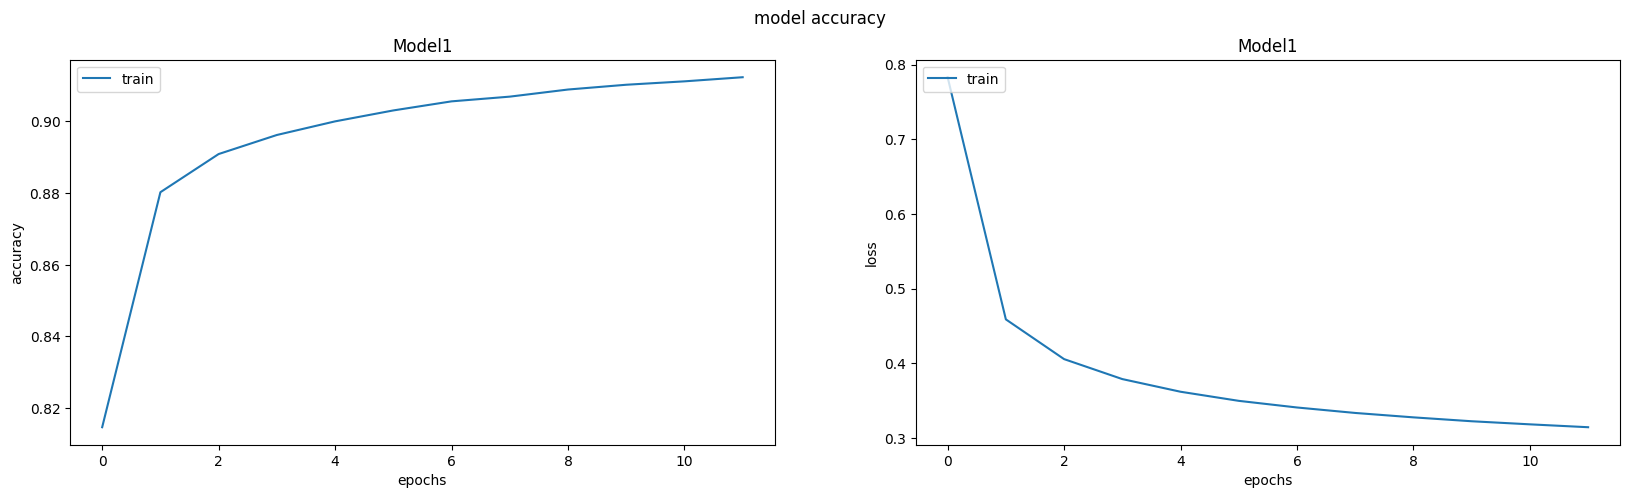

In [ ]:
# Accuracy

fig, axs= plt.subplots(nrows=1, ncols=2, figsize=(20,5))
fig.suptitle('model accuracy')

axs[0].plot(history.history["accuracy"])
axs[0].legend(['train'], loc='upper left')
axs[0].set_title('Model1')
axs[0].set_xlabel("epochs")
axs[0].set_ylabel("accuracy")

axs[1].plot(history.history["loss"])
axs[1].legend(['train'], loc='upper left')
axs[1].set_title('Model1')
axs[1].set_xlabel("epochs")
axs[1].set_ylabel("loss")

In [ ]:
# Calculer la prédiction sur des nouvelles données de test
score = model.evaluate(x_test, y_test)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.3013 - accuracy: 0.9177
Test Loss: 0.3013259172439575
Test Accuracy: 0.9176999926567078


# Partie II : réseau de neurones profond (MLP)

In [ ]:
# Définir le second modèle avec plusieurs couches cachées et Sigmoid
model_S = Sequential()
model_S.add(Dense(10, activation='sigmoid'))
model_S.add(Dense(30, activation='sigmoid'))
model_S.add(Dense(60, activation='sigmoid'))
model_S.add(Dense(100, activation='sigmoid'))
model_S.add(Dense(200, activation='sigmoid'))
model_S.add(Dense(nb_classes, input_dim = 784))
model_S.add(Activation('softmax'))

# Définir le second modèle avec plusieurs couches cachées et Relu
model_R = Sequential()
model_R.add(Dense(10, activation='relu'))
model_R.add(Dense(30, activation='relu'))
model_R.add(Dense(60, activation='relu'))
model_R.add(Dense(100, activation='relu'))
model_R.add(Dense(200, activation='relu'))
model_R.add(Dense(nb_classes, input_dim = 784))
model_R.add(Activation('softmax'))

In [ ]:
# Compiler le modèle Sigmoïd
model_S.compile(loss= 'categorical_crossentropy',
              optimizer ='sgd',
              metrics = ['accuracy'])

# Compiler le modèle relu
model_R.compile(loss= 'categorical_crossentropy',
              optimizer ='sgd',
              metrics = ['accuracy'])

In [ ]:
# Entraîner le modèle sigmoïd sur les données d’entrainement
history_S = model_S.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3045 - accuracy: 0.1051
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3044 - accuracy: 0.1042
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3044 - accuracy: 0.1065
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3041 - accuracy: 0.1070
Epoch 5/10
1875/1875 [==============================] - 12s 7ms/step - loss: 2.3042 - accuracy: 0.1085
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3038 - accuracy: 0.1082
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3042 - accuracy: 0.1059
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3039 - accuracy: 0.1071
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3038 - accuracy: 0.1077
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.30

In [ ]:
# Entraîner le modèle relu sur les données d’entrainement
history_R = model_R.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.2554 - accuracy: 0.5800
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3916 - accuracy: 0.8827
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3158 - accuracy: 0.9051
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2790 - accuracy: 0.9156
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2512 - accuracy: 0.9243
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2309 - accuracy: 0.9301
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2142 - accuracy: 0.9349
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2012 - accuracy: 0.9388
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1911 - accuracy: 0.9423
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.181

Text(0, 0.5, 'loss')

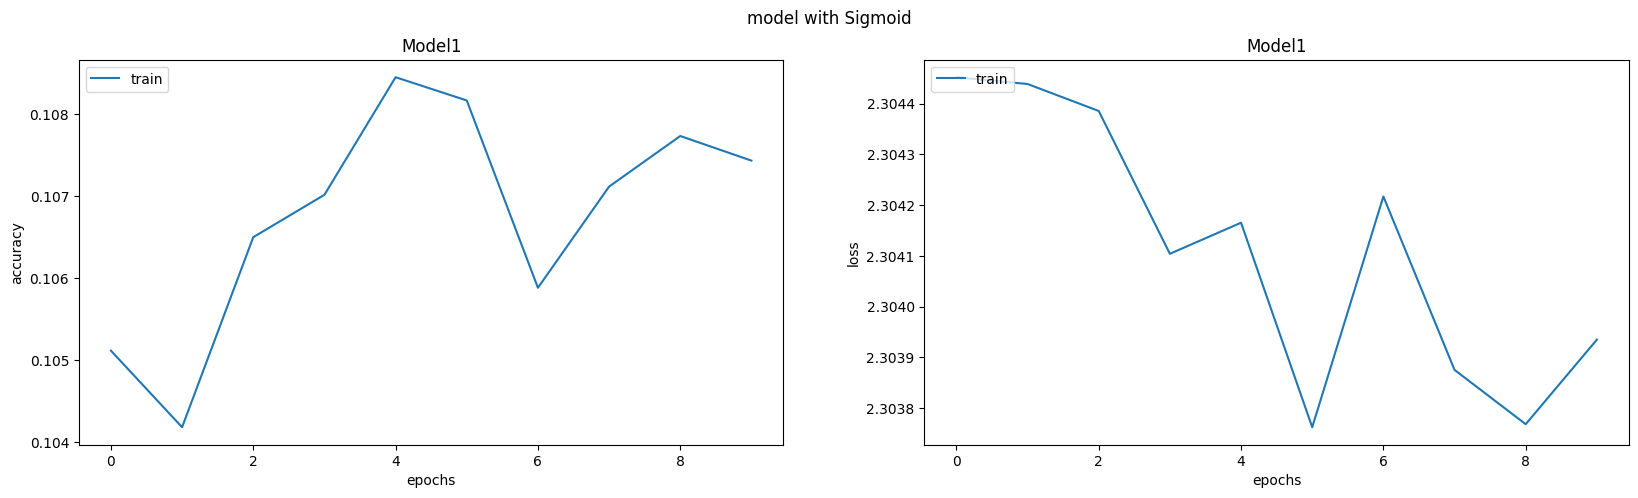

In [ ]:
# Accuracy

fig, axs= plt.subplots(nrows=1, ncols=2, figsize=(20,5))
fig.suptitle('model with Sigmoid')

axs[0].plot(history_S.history["accuracy"])
axs[0].legend(['train'], loc='upper left')
axs[0].set_title('Model1')
axs[0].set_xlabel("epochs")
axs[0].set_ylabel("accuracy")

axs[1].plot(history_S.history["loss"])
axs[1].legend(['train'], loc='upper left')
axs[1].set_title('Model1')
axs[1].set_xlabel("epochs")
axs[1].set_ylabel("loss")

Text(0, 0.5, 'loss')

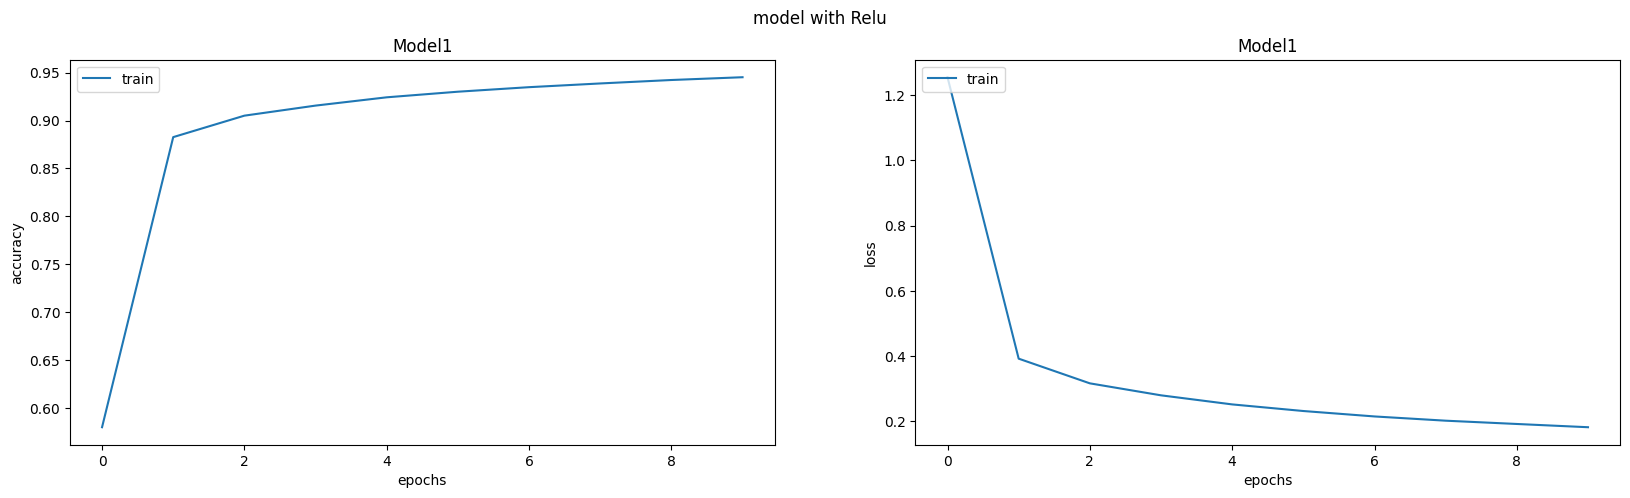

In [ ]:
# Accuracy and loss

fig, axs= plt.subplots(nrows=1, ncols=2, figsize=(20,5))
fig.suptitle('model with Relu')

axs[0].plot(history_R.history["accuracy"])
axs[0].legend(['train'], loc='upper left')
axs[0].set_title('Model1')
axs[0].set_xlabel("epochs")
axs[0].set_ylabel("accuracy")

axs[1].plot(history_R.history["loss"])
axs[1].legend(['train'], loc='upper left')
axs[1].set_title('Model1')
axs[1].set_xlabel("epochs")
axs[1].set_ylabel("loss")

In [ ]:
# Calculer la prédiction du modele sigmoïd sur des nouvelles données de test
score = model_S.evaluate(x_test, y_test)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 2.3049 - accuracy: 0.1028
Test Loss: 2.304879903793335
Test Accuracy: 0.10279999673366547


In [ ]:
# Calculer la prédiction du modele Relu sur des nouvelles données de test
score = model_R.evaluate(x_test, y_test)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.1836 - accuracy: 0.9462
Test Loss: 0.1836165338754654
Test Accuracy: 0.9462000131607056


313/313 [==============================] - 1s 2ms/step


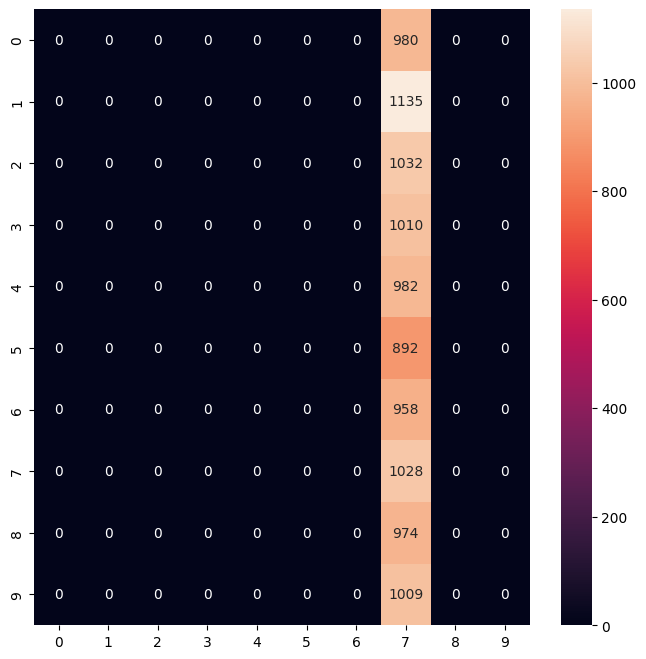

In [ ]:
# Matrice de transition du modèle Sigmoïd
import sklearn.metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
y_predictions = np.argmax (model_S.predict (x_test), axis=-1)
y_predictions=utils.to_categorical(y_predictions,nb_classes)
plt.figure(figsize=(8,8))
cm = sklearn.metrics.confusion_matrix(y_test.argmax(axis = 1),y_predictions.argmax(axis=1))
sns. heatmap(cm, annot=True, fmt='g' )
plt.show()

313/313 [==============================] - 1s 2ms/step


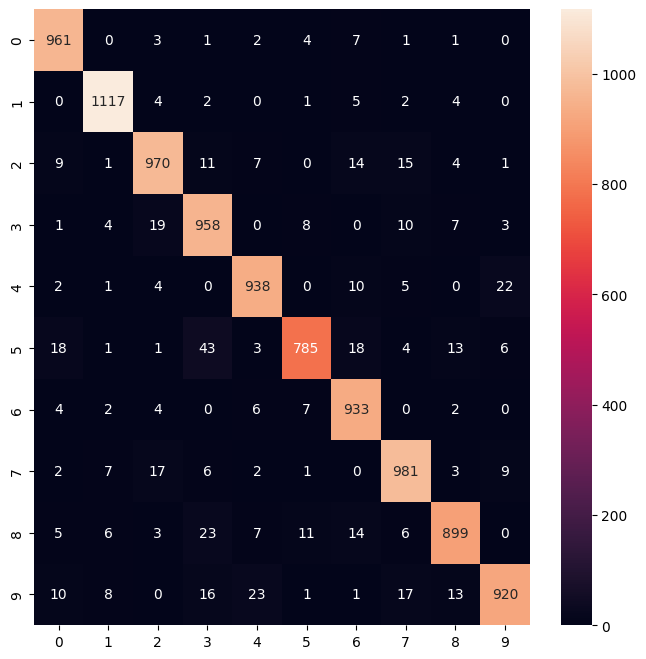

In [ ]:
# Matrice de transition du modèle Relu
import sklearn.metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
y_predictions = np.argmax (model_R.predict (x_test), axis=-1)
y_predictions=utils.to_categorical(y_predictions,nb_classes)
plt.figure(figsize=(8,8))
cm = sklearn.metrics.confusion_matrix(y_test.argmax(axis = 1),y_predictions.argmax(axis=1))
sns. heatmap(cm, annot=True, fmt='g' )
plt.show()

Modèle avec Dropout

In [ ]:
# Définir le second modèle avec plusieurs couches cachées, Dropout de 25% et Relu
model_D = Sequential()
model_D.add(Dense(10, activation='relu'))
model_D.add(Dropout(0.25))
model_D.add(Dense(30, activation='relu'))
model_D.add(Dropout(0.25))
model_D.add(Dense(60, activation='relu'))
model_D.add(Dropout(0.25))
model_D.add(Dense(100, activation='relu'))
model_D.add(Dropout(0.25))
model_D.add(Dense(200, activation='relu'))
model_D.add(Dropout(0.25))
model_D.add(Dense(nb_classes, input_dim = 784))
model_D.add(Activation('softmax'))

In [ ]:
# Compiler le modèle
model_D.compile(loss= 'categorical_crossentropy',
              optimizer ='sgd',
              metrics = ['accuracy'])

In [ ]:
# Entraîner le modèle sur les données d’entrainement
history_D = model_D.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.3757 - accuracy: 0.5288
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4281 - accuracy: 0.8708
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3279 - accuracy: 0.9031
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2855 - accuracy: 0.9151
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2573 - accuracy: 0.9243
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2348 - accuracy: 0.9295
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2192 - accuracy: 0.9345
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2096 - accuracy: 0.9363
Epoch 9/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2014 - accuracy: 0.9398
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1

Text(0, 0.5, 'loss')

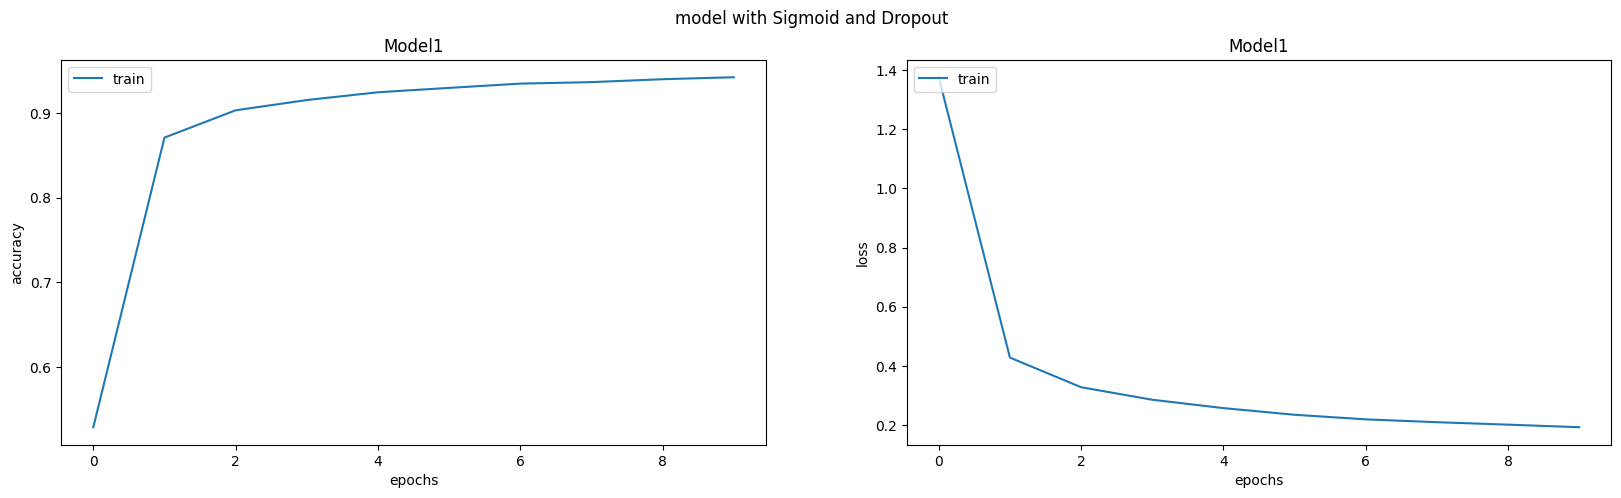

In [ ]:
# Accuracy

fig, axs= plt.subplots(nrows=1, ncols=2, figsize=(20,5))
fig.suptitle('model with Sigmoid and Dropout')

axs[0].plot(history_D.history["accuracy"])
axs[0].legend(['train'], loc='upper left')
axs[0].set_title('Model1')
axs[0].set_xlabel("epochs")
axs[0].set_ylabel("accuracy")

axs[1].plot(history_D.history["loss"])
axs[1].legend(['train'], loc='upper left')
axs[1].set_title('Model1')
axs[1].set_xlabel("epochs")
axs[1].set_ylabel("loss")

In [ ]:
# Calculer la prédiction du modele sur des nouvelles données de test
score = model_D.evaluate(x_test, y_test)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.1909 - accuracy: 0.9424
Test Loss: 0.19088499248027802
Test Accuracy: 0.9423999786376953


313/313 [==============================] - 1s 2ms/step


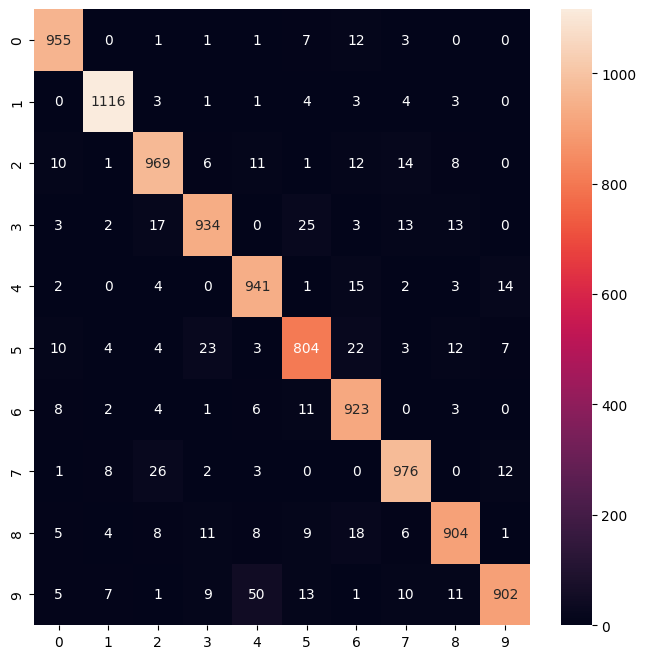

In [ ]:
# Matrice de transition
y_predictions = np.argmax (model_D.predict (x_test), axis=-1)
y_predictions=utils.to_categorical(y_predictions,nb_classes)
plt.figure(figsize=(8,8))
cm = sklearn.metrics.confusion_matrix(y_test.argmax(axis = 1),y_predictions.argmax(axis=1))
sns. heatmap(cm, annot=True, fmt='g' )
plt.show()